# Network Analysis


# Analyzing a network

In [9]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.linalg.graphmatrix import adjacency_matrix
from collections import Counter
from pylab import rcParams #---> Library for set the attributes of the figures
import matplotlib.colors as mcolors
import numpy as np
import community
from networkx.algorithms.shortest_paths.generic import shortest_path,shortest_path_length, all_shortest_paths
import powerlaw
from scipy.stats import lognorm, kstest
#Magic functions (%) for setting up the matplotlib and increase the resolution of the plots:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Loading the network data set from the edge-list file: ia-enron.edges as Gx. This is the edges of an undirected binary
contact network. This dataset is a modifiedversion of data in 
Giang Hoang Nguyen et al. Continuous-Time Dynamic Network Embeddings. WWW ’18:
Companion Proceedings of the The Web Conference 2018 DOI: 10.1145/3184558.3191526

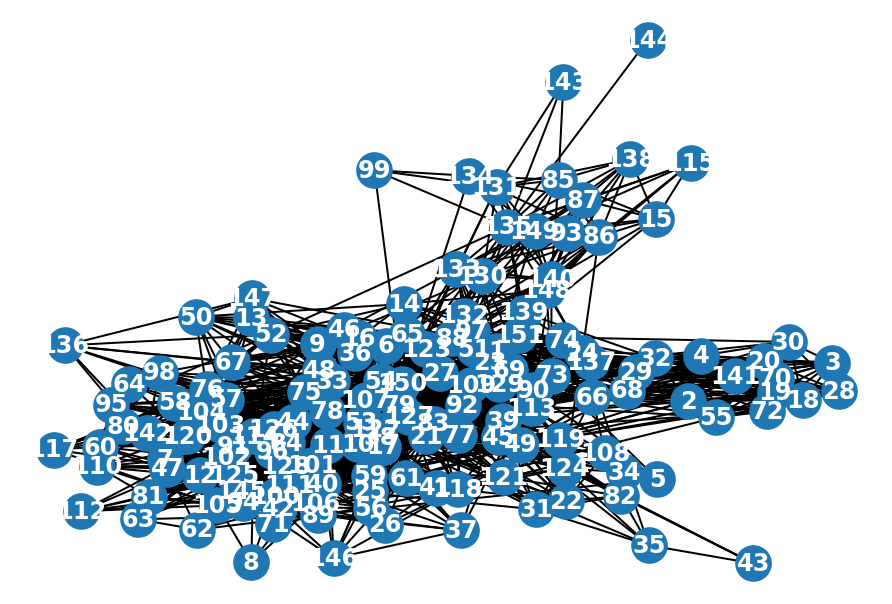

In [152]:
# loading the network from file
Gx = nx.read_edgelist("ia-enron.edges.txt", nodetype = int)
# plotting the graph of Gx
nx.draw(Gx, with_labels=True, font_weight='bold', font_color='white') #node_color='darkblue'
plt.show()

## Plotting the Network Adjacency Matrix

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Text(0, 0.5, 'node idx')

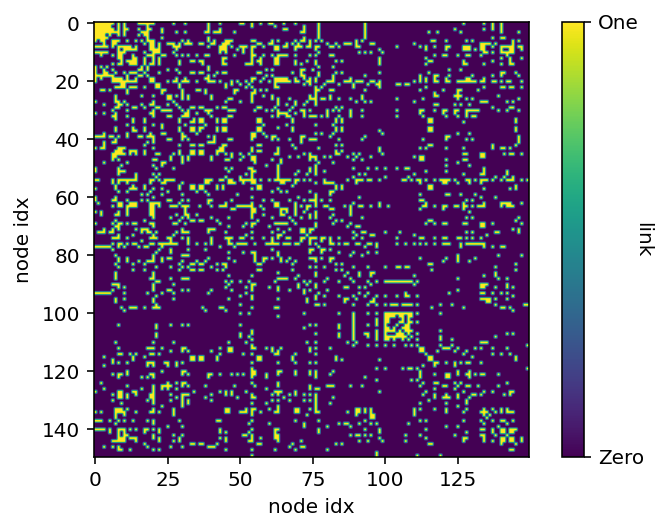

In [14]:
# plotting adjacency matrix
adj_matrix = adjacency_matrix(Gx)
print(nx.to_numpy_matrix(Gx)) #--> visualize the entire adjacency matrix
plt.imshow(nx.to_numpy_matrix(Gx)) #--> This function create a heatmaps from 2-dimensional numpy arrays.
cbar = plt.colorbar() #--> set the colorbar of the heatmap
cbar.set_ticks([0,1]) #--> set the range of the color bar
cbar.ax.set_yticklabels(['Zero','One'],) #--> set the label of the number to display in the color bar

cbar.set_label('link', rotation=270) #--> set the label of the color bar and rotate it
plt.xlabel('node idx') #--> set the label of the x axis
plt.ylabel('node idx') #--> set the label of the y axis

## Plotting the Degree distribution.

[Text(76.4, 0, '76'),
 Text(75.4, 0, '75'),
 Text(66.4, 0, '66'),
 Text(65.4, 0, '65'),
 Text(62.4, 0, '62'),
 Text(46.4, 0, '46'),
 Text(45.4, 0, '45'),
 Text(41.4, 0, '41'),
 Text(39.4, 0, '39'),
 Text(38.4, 0, '38'),
 Text(36.4, 0, '36'),
 Text(34.4, 0, '34'),
 Text(33.4, 0, '33'),
 Text(32.4, 0, '32'),
 Text(31.4, 0, '31'),
 Text(30.4, 0, '30'),
 Text(29.4, 0, '29'),
 Text(28.4, 0, '28'),
 Text(27.4, 0, '27'),
 Text(26.4, 0, '26'),
 Text(25.4, 0, '25'),
 Text(24.4, 0, '24'),
 Text(23.4, 0, '23'),
 Text(22.4, 0, '22'),
 Text(21.4, 0, '21'),
 Text(20.4, 0, '20'),
 Text(19.4, 0, '19'),
 Text(18.4, 0, '18'),
 Text(17.4, 0, '17'),
 Text(16.4, 0, '16'),
 Text(15.4, 0, '15'),
 Text(14.4, 0, '14'),
 Text(13.4, 0, '13'),
 Text(12.4, 0, '12'),
 Text(11.4, 0, '11'),
 Text(10.4, 0, '10'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(1.4, 0, '1')]

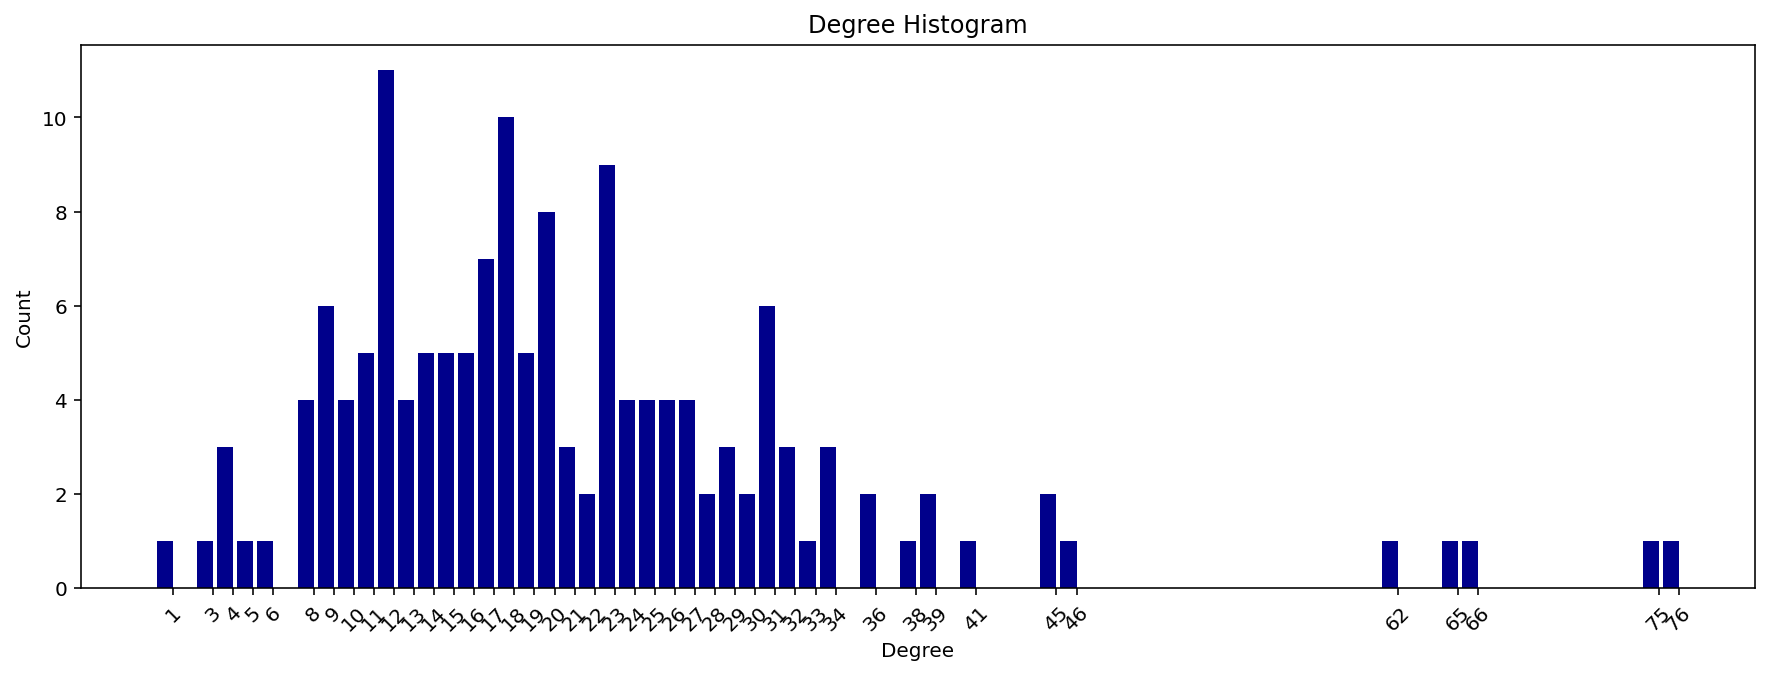

In [186]:
# Plotting the degree distribution of network Gx
Gx_degree = dict(Gx.degree(Gx.nodes, weight='weight'))
#print(sorted(Gx_degree.values(), reverse=True))
degree_count = Counter(sorted(Gx_degree.values(), reverse=True))
deg, cnt = zip(*degree_count.items()) #<-- Function that create lists of iterables, 
                                     #one for the degrees and the other one for the frquencies

rcParams['figure.figsize'] = 15, 5 #<-- Set the plot size
fig, ax = plt.subplots() #<-- Create the subplots

plt.bar(deg, cnt, width=0.80, color='darkblue') #<-- Plot a bar plot with the degrees and their frequencies

#Set plot attributes as title, x and y labels, and ticks with frequencies larger than zero
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg, rotation=45)

## Plotting the log of Frequency vs degree distribution to see the shape of the distribution
Test the hypothesis that degree distribution has a lognormal shape.
Using the Kolomoropv-Smirnov test can we accept or reject this hypothesis?

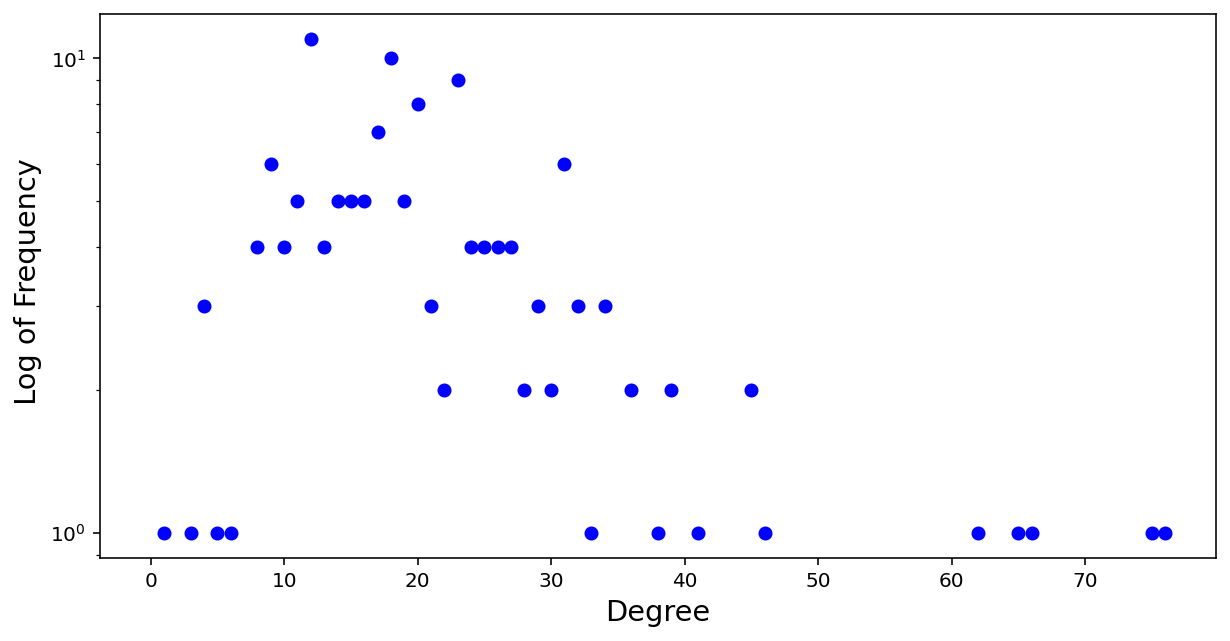

In [54]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace
def plot(data):
    """ Plot Distribution """
    plt.plot(range(len(data)),data,'bo')
    plt.yscale('log')
    plt.ylabel(' Log of Frequency', fontsize = 'x-large')
    plt.xlabel('Degree', fontsize = 'x-large')
    plt.show()
plot(np.bincount(list(dict(Gx.degree()).values())))

# plotting the log of Frequency vs degree distribution to see the shape of the distribution

In [40]:
#  Test the hypothesis that degree distribution has a lognormal shape.
# Using the Kolomoropv-Smirnov test can we accept or reject this hypothesis

x = list(Gx_degree.values())
sigma, loc, scale = lognorm.fit(x, floc=0)
mu = np.log(scale)

print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma)

stat, p = kstest(x, 'lognorm', args=(sigma, 0, scale), alternative='two-sided')
print("KS Test:")
print("stat    = %9.5f" % stat)
print("p-value = %9.5f" % p)



mu    =   2.90258
sigma =   0.60948
KS Test:
stat    =   0.08136
p-value =   0.26002


Null hypothesis is that the degree distribution has lognormal shape. Alternative, hypothesis is that it is two-sided. P-value (0.26) is greater than significance level of 5%, hence we fail to reject the null hypothesis. Thus, we can conclude from Kolomoropv-Smirnov test that the degree distribution of network Gx has lognormal shape.

## Is the Network you are analyzing Assortative or Disassortative?

In [154]:
#Calculating the assortativity coefficient of network Gx
nx.degree_assortativity_coefficient(Gx)


-0.04538787508087504

Assortative coefficient value of -0.045 suggests that this network is dissortative.

## Plotting the PDF and CCDF of the degree distribution as a power law

Calculating best minimal value for power law fit
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.7/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


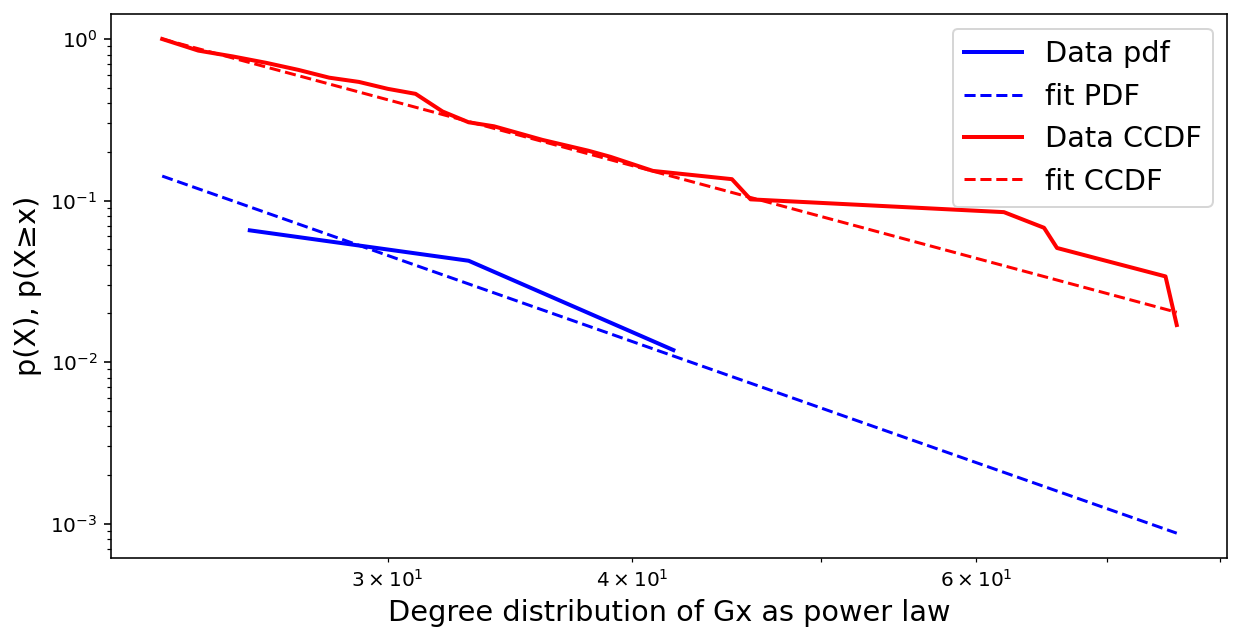

In [18]:

#We are using the powerplot package see the paper Jeff Alstott ,Ed Bullmore,Dietmar Plenz,  
# powerlaw: A Python Package for Analysis of Heavy-Tailed Distributions,  
#  PlosOne 2014 DOI: 10.1371/journal.pone.0085777
# or the repository https://github.com/jeffalstott/powerlaw
def Plot_pdf_CCDF(Data, xlabel, ylabel):

    
    '''This function plot and compares the the Probability Density Function (PDF) and the Complement Cummulative
    Density Function. This functions are taken from the paper: https://doi.org/10.1371/journal.pone.0085777
    
    Attributes:
    Data: An array of values
    '''
    
    fit = powerlaw.Fit(Data) #<-- Fit the data
    fig2=fit.plot_pdf(color='b', linewidth=2) #<-- Plot the PDF of the original data

    fit.power_law.plot_pdf(color='b', linestyle='dashed', ax=fig2) #<-- Plot the PDF of the power law fit

    fit.plot_ccdf(color='r', linewidth=2, ax=fig2) #<-- Plot the PDF of the original data in the same fig

    fit.power_law.plot_ccdf(color='r', linestyle='dashed', ax=fig2) #<-- Plot the PDF of the power law fit

    plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')
    plt.xlabel(xlabel, fontsize = 'x-large')
    plt.ylabel(ylabel, fontsize = 'x-large')
    plt.show()
    
# Fitting and plotting the pdf and ccdf of degree distribution of Gx as power law
Plot_pdf_CCDF(list(Gx_degree.values()), 'Degree distribution of Gx as power law', 'p(X), p(X≥x)')

# Centrality and Community Detection

## Centralities

Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of ties that the node directs to others. 

Eigenvector centrality is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. Google's PageRank and the Katz centrality are variants of the eigenvector centrality.
Eg. In neuroscience, the eigenvector centrality of a neuron in a model neural network has been found to correlate with its relative firing rate.


## Closeness Centrality.

In [19]:
# function for centrality closeness
# Creating the function centrality_closeness(), that inputs the network and returns the closeness centrality of each node.
def centrality_closeness(G):
    N = len(G.nodes())# no of nodes in the network
    centralities = {}
    for node1 in G.nodes():
        sp = [shortest_path_length(G, node1, node2) for node2 in G.nodes()] # weight='weight'
        Ci = (N-1)/np.sum(sp) # normalized closeness centrality for ith node
        centralities[node1] = Ci
    return centralities
# getting the centrality closeness of Gx
centrality_closeness(Gx)

{1: 0.4983277591973244,
 2: 0.476038338658147,
 3: 0.38303341902313626,
 4: 0.4209039548022599,
 5: 0.3973333333333333,
 6: 0.5155709342560554,
 7: 0.45565749235474007,
 8: 0.43567251461988304,
 9: 0.4837662337662338,
 10: 0.5359712230215827,
 11: 0.4950166112956811,
 12: 0.45565749235474007,
 13: 0.4806451612903226,
 14: 0.4670846394984326,
 15: 0.415041782729805,
 16: 0.5155709342560554,
 17: 0.5752895752895753,
 18: 0.415041782729805,
 19: 0.4318840579710145,
 20: 0.40821917808219177,
 21: 0.5228070175438596,
 22: 0.45987654320987653,
 23: 0.5209790209790209,
 24: 0.4885245901639344,
 25: 0.5137931034482759,
 26: 0.4806451612903226,
 27: 0.5302491103202847,
 28: 0.3983957219251337,
 29: 0.4950166112956811,
 30: 0.38303341902313626,
 31: 0.46273291925465837,
 32: 0.48220064724919093,
 33: 0.5340501792114696,
 34: 0.45987654320987653,
 35: 0.4197183098591549,
 36: 0.4950166112956811,
 37: 0.4281609195402299,
 38: 0.5601503759398496,
 39: 0.5137931034482759,
 40: 0.5068027210884354,
 4

## Comparison Centralities
Using the network Gx, compare the result of your metrics centrality_closeness() with the eigenvector 
centrality, with a scatter plot on the x closeness centrality measure and y the eigenvector centrality one. Is
there any correlation?

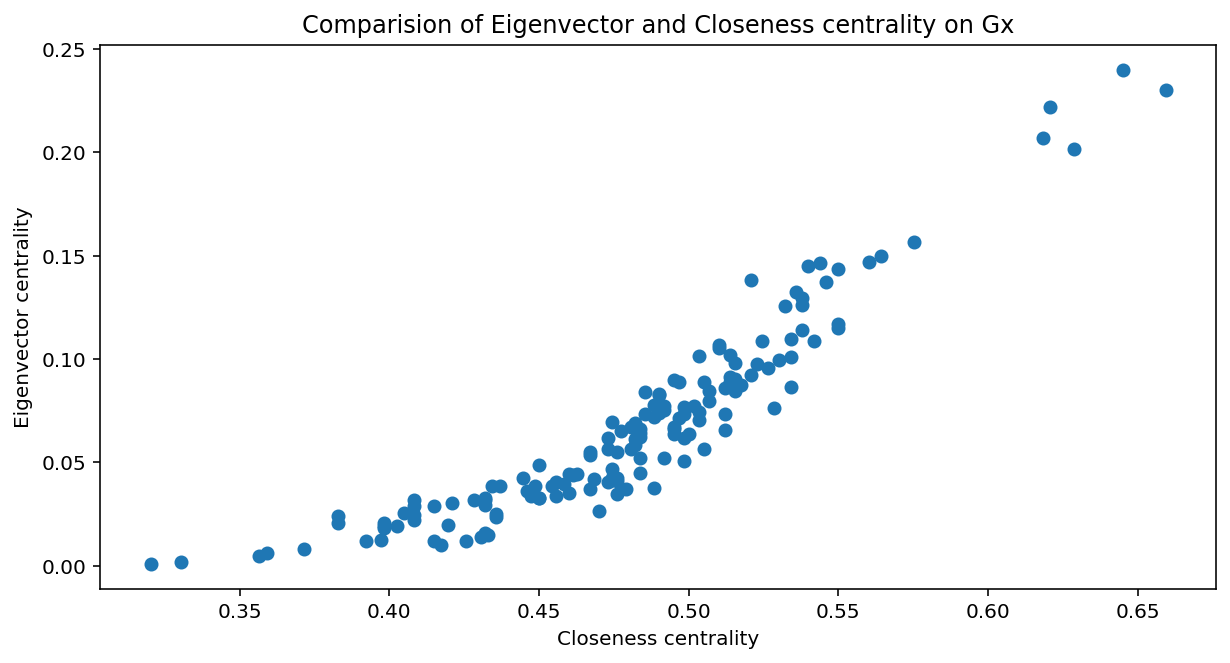

In [20]:
# Comparing the results of closeness centrality with eigen vector centrality
eigen_centralities= nx.eigenvector_centrality(Gx)
closeness_centralities = centrality_closeness(Gx)
plt.scatter(closeness_centralities.values(),eigen_centralities.values())
plt.title("Comparision of Eigenvector and Closeness centrality on Gx")
plt.ylabel("Eigenvector centrality")
plt.xlabel("Closeness centrality")
plt.show()


There is high correlation between the eigen vector and closeness centrality,which means that high influence networks in the node are more closely connected.

## Centrality Measure

In [160]:
# checking the eigen vector centrality of the network
# 150: 0.6592920353982301 Node is 150 with highest closeness centrality
for item in eigen_centralities.keys():
    if eigen_centralities[item]>0.23:
        print(item,eigen_centralities[item])

122 0.23999231568820278
150 0.2301099823144734


In [161]:
# checking the highest degree centralities in the network
for item in nx.degree_centrality(Gx).keys():
    if nx.degree_centrality(Gx)[item]>0.50:
        print(item,nx.degree_centrality(Gx)[item])

122 0.5033557046979865
150 0.5100671140939598


Imagine that Gx is now representing a social network, similar to Facebook, Instagram or WeChat. You have to advertise a product and you have budget to hire only one influencer (i.e. a node in the network Gx).
Either of 122 or 150 can be influencers as they both have high centrality measures. All of the centrality measures suggests that 122 or 150 node can be influencers.

## Influencer

<ipython-input-170-a4c8a46951e5>:30: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a


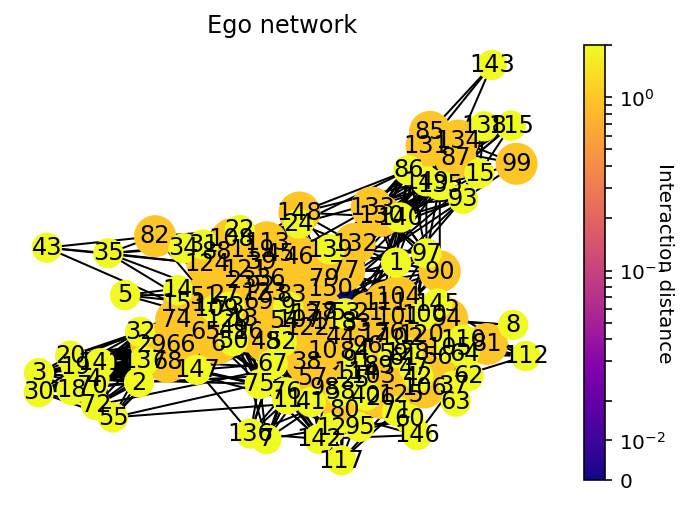

In [170]:
# creating ego network function
# Define a function Draw_ego_network that inputs a network G (a networkx network), a network layout (as
# list of nodes position), and a node id and the maximum distance of interaction (as int). The function
# Draw_ego_network will output the network plot of G outlining (with a different color and bigger size) the
# node selected, and the ego network of the node id coloring in different colors the links and the nodes depending
# on the interaction distance.

def Draw_ego_network(G, network_layout, node, max_interaction_distance):
    interaction_dict = {}
    nodes_set = set([node])
    interaction_nodes = nodes_set
    
    for d in range(1,max_interaction_distance+1):
        interaction_dict[d] = set()
        for node1 in nodes_set:
            interaction_dict[d] = interaction_dict[d].union(set(G.adj[node1].keys())-interaction_nodes) # unique
        interaction_nodes = interaction_nodes.union(interaction_dict[d])
        nodes_set = interaction_dict[d]-nodes_set
    pos = network_layout
    node_colors = [0]
    node_list = [node]
    node_sizes = [500]
    for key in interaction_dict.keys():
        node_colors += [key]*len(interaction_dict[key])
        node_list += list(interaction_dict[key])
        node_sizes += [400 * 1/key]*len(interaction_dict[key]) #<-- Set the node size
    
    G = G.subgraph(node_list)
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.plasma, 
                                   node_color=node_colors,
                                   nodelist=node_list)#<-- Set the node attributes to be plotted,
                                                                   # with the network, the nodes position, 
                                                                   # the color map for the measure that comes 
                                                                   # in numbers ranging in the color map
    
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a 
                                                                   #symmetric logaritmic normalized scale
    
    labels = nx.draw_networkx_labels(G, pos, font_color='black') #<-- Set the node labels
    edges = nx.draw_networkx_edges(G, pos, ) #<-- Set the edges pisitions
    
    plt.title('Ego network') #<-- Set the title of the plot
    cbar = plt.colorbar(nodes) #--> set the range of the color bar
    
    cbar.set_label('Interaction distance', rotation=270) #--> Set the label of the color bar and rotate it
    
    plt.axis('off') #<-- Remove the axis of the network plot
    plt.show()
# drawing the ego network of node 150
# Test the function with the network Gx, the node id of the influencer selected in the question 2.c, 
Draw_ego_network(Gx, network_layout=nx.spring_layout(Gx), node=150, max_interaction_distance=2)

## Community Detection and Centrality.
Detecting the communities and plotting the network with its communities. Plot the adjacency matrix of the network rearranged in order to outline the
communities.

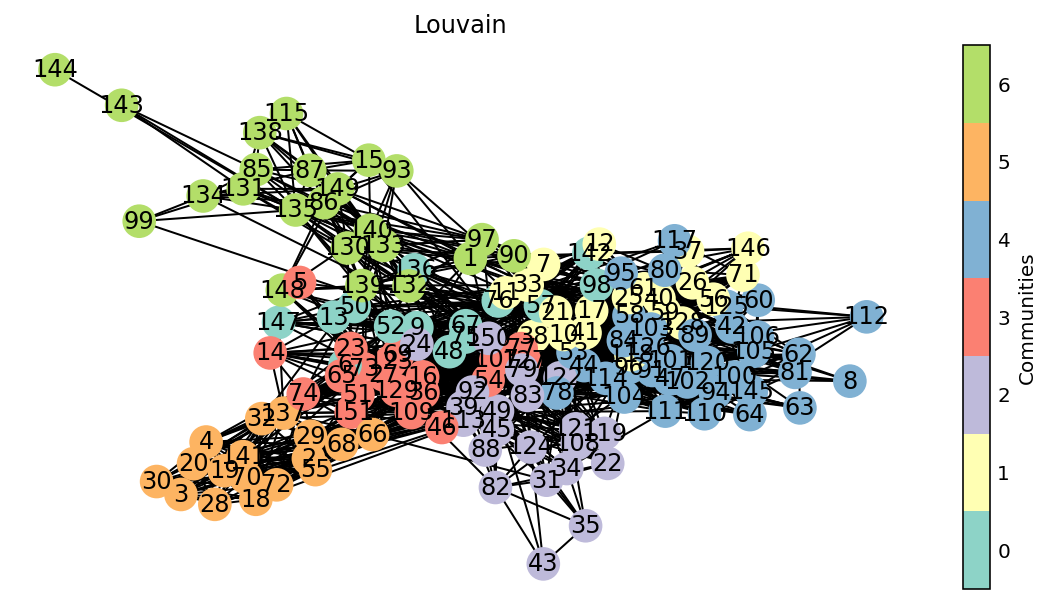

In [29]:
# 2.e
def draw_clu(G, pos, measures, measure_name):
  
    # Create an array to contain the clusters which have been found
    clusters=np.array(list(set(measures.values())))

    # Create a figure to draw the plots and charts
    plt.figure()

    # Create the plot of the network to be placed in the figure
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))


    # Add labels to the plot
    labels = nx.draw_networkx_labels(G, pos)

    # Add edges to the plot
    edges = nx.draw_networkx_edges(G, pos)

    # Create the title of the plot
    plt.title(measure_name)

    # Add a colour bar to act as a legend
    cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Communities')
    cb.ax.tick_params(length=0)
    # Adds the community labels to the colour bar
    cb.set_ticklabels(list(set(measures.values())))


    nodes.set_clim(-0.5, len(clusters)-0.5)

    # Show the plot without the x/y axis
    plt.axis('off')
    plt.show()
    
# Now plot the enwtork Gx with its communities
draw_clu(Gx, nx.spring_layout(Gx), community.best_partition(Gx), 'Louvain')

Louvian algorith is being used for detecting the communities in the network Gx. According to this, Gx has 7 communities. These are shown in the plot above.

## Finding and plotting the longest Shortest Path.


Longest shortest path in the network:  [151, 66, 53, 135, 144]
Length of longest shortest path:  4
Source Node:  151
Target Node:  144


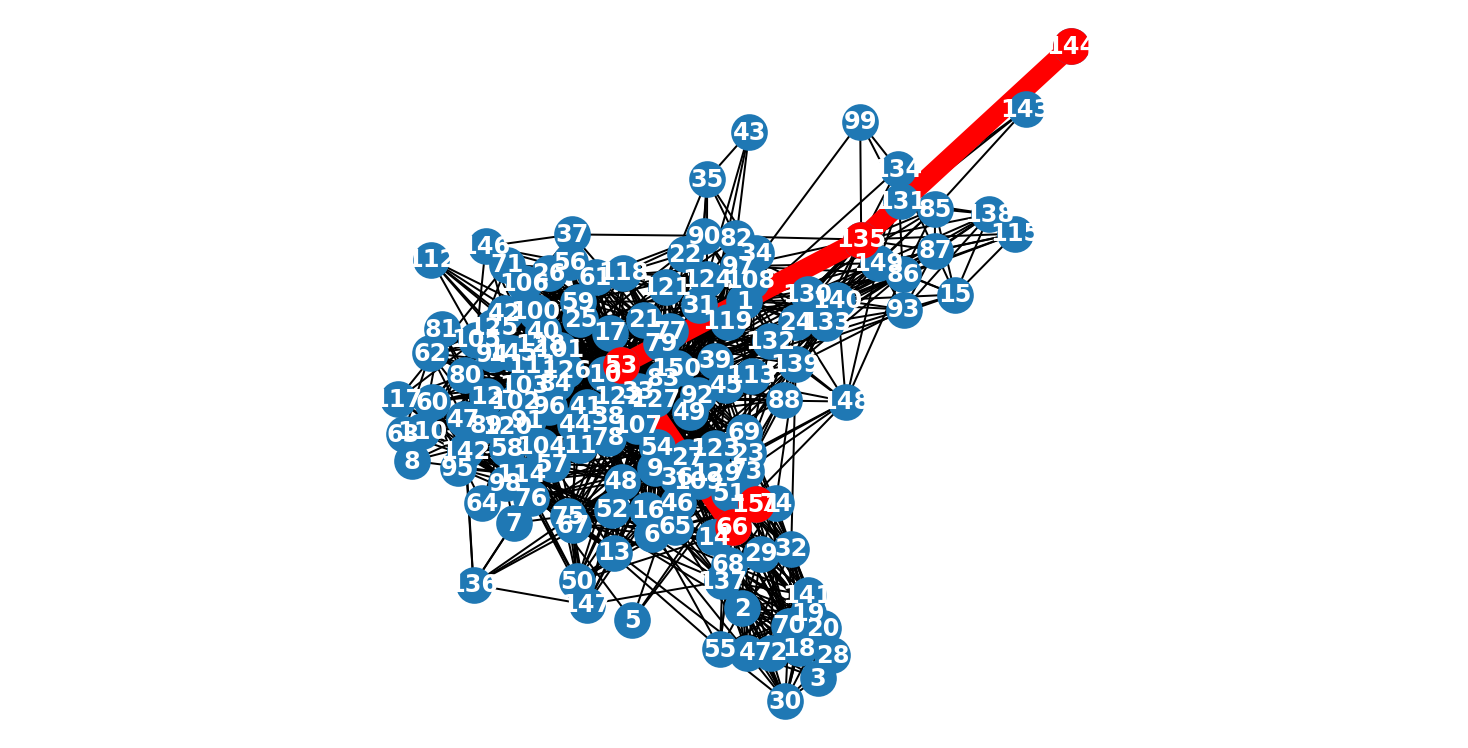

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [31]:
# creating the longest shortest function
# Creating a function plot_long_shortest() that takes as input Gx. The function plot_long_shortest()
# returns the plot of Gx with outlined the longest shortest path present inside the network, print the length of
# path as list of number of nodes included in the shortest path). Find the longest shortest paths inside the network
# Gx, using your function plot_long_shortest() print the source node the target node and the ids of the nodes
# within the longest shortest path.
def plot_long_shortest(Gx) :
    nodes = list(Gx.nodes())
    longest_shortest_path = []
    for i in range(len(nodes)):
        node1 = nodes[i]
        for j in range(i+1,len(nodes)):
            node2 = nodes[j]
            sp = shortest_path(Gx, source=node1, target=node2)
            if len(sp) > len(longest_shortest_path):
                longest_shortest_path = sp
    print('Longest shortest path in the network: ', longest_shortest_path)
    print('Length of longest shortest path: ', len(longest_shortest_path)-1)
    print("Source Node: ", longest_shortest_path[0])
    print("Target Node: ", longest_shortest_path[-1])

    pos = nx.spring_layout(Gx) # Set the layout of the network
    nx.draw(Gx, pos, with_labels=True, font_weight='bold', font_color='white')
    path_edges = list(zip(longest_shortest_path,longest_shortest_path[1:])) #<-- Create a list of iterables with the edges of the shortest path
    nx.draw_networkx_nodes(Gx,pos,nodelist=longest_shortest_path,node_color='r', label=True)  #<-- Plot the nodes
    nx.draw_networkx_edges(Gx,pos,edgelist=path_edges,edge_color='r',width=10)  #<-- Plot the edges
    plt.axis('equal')
    plt.show()
    plt.show()
    return plt
    
plot_long_shortest(Gx)


[151, 66, 53, 135, 144] is the longest shortest path in the nwtwork Gx. The plot is show above.Red line indicates the longest shortest path.

# Question3: SI Model

## Define the function SI_model()
It inputs 
• G (Network as networkx)
• initial_infecteds (as list of nodes ID)
• beta (trasmission probability as float)
• t_simulation (simulation iteration time as int - one day is one time iteration)
Output: A dictionary that contains the nodes status at each time steps. In this case the status can be:
• ’S’ as susceptible.
• ’I’ as Infected.

Using the network Gx and beta=0.01, t_simulation=300, initial_infecteds=(list of 3 random nodes)
plot the number of user in each status at each time step of the simulation.

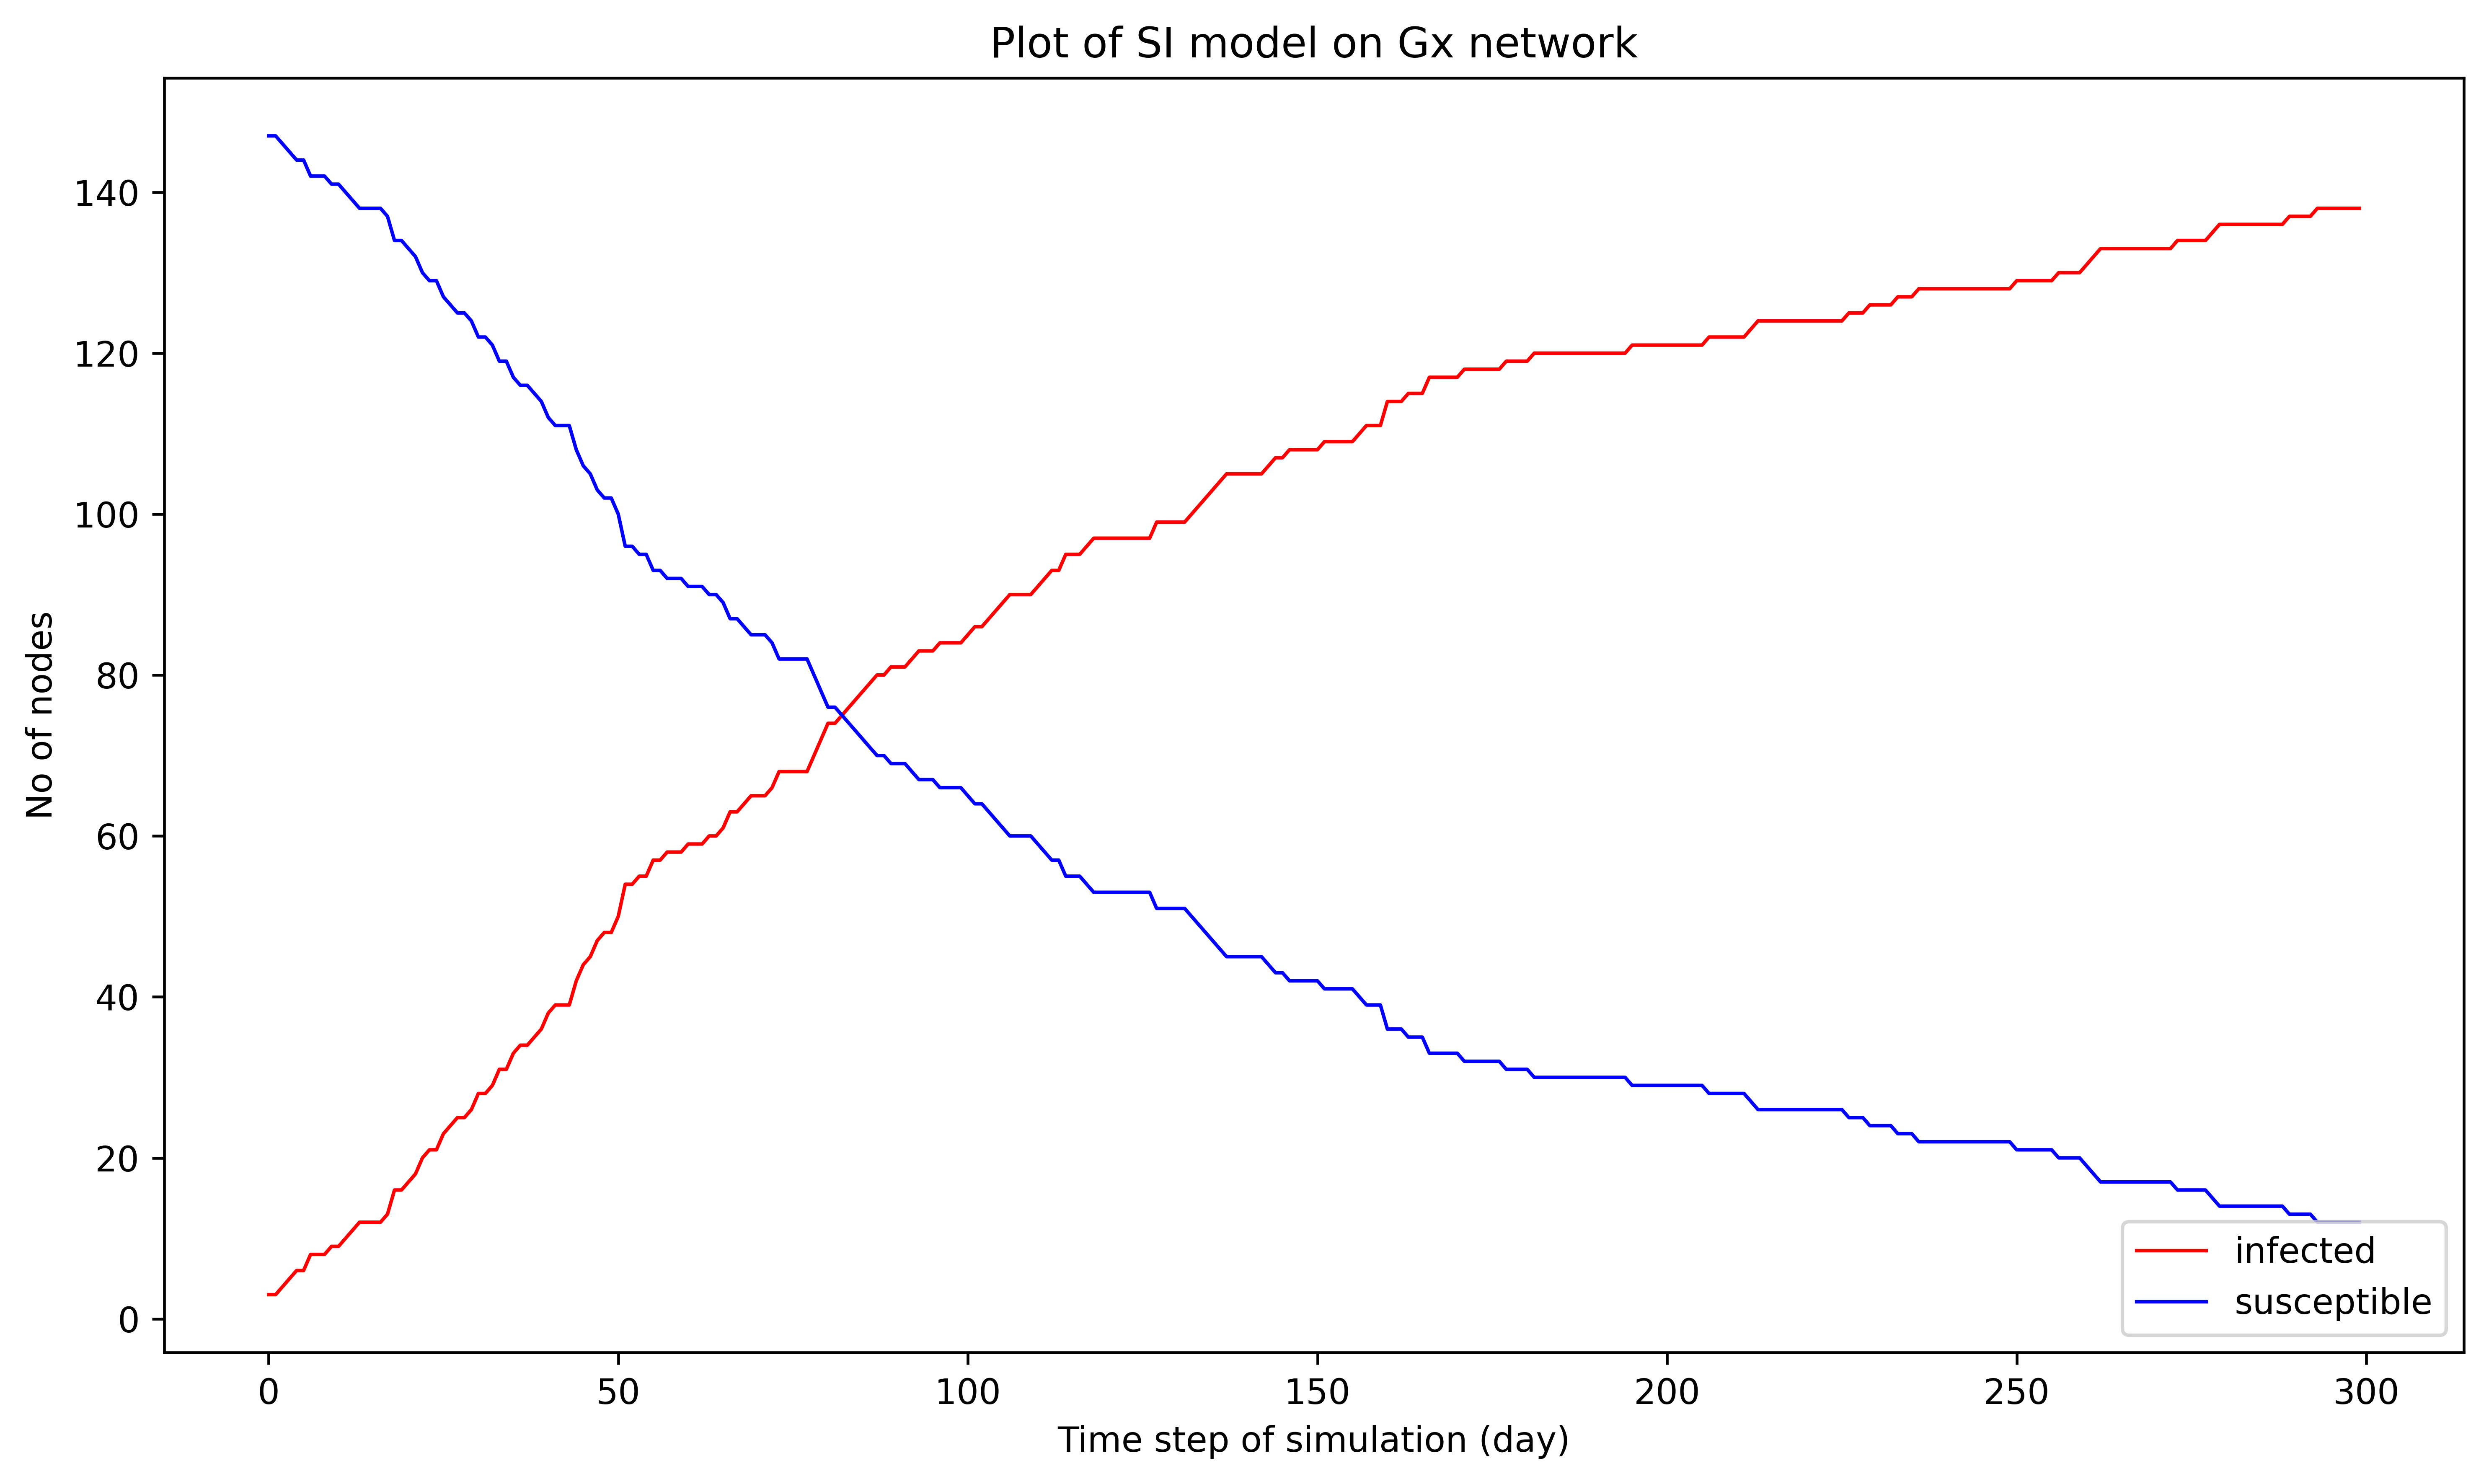

In [150]:
# creating SI model function
def SI_model(G, initial_infecteds, beta, t_simulation):
    
    infected = initial_infecteds # 
    susceptible = [node for node in G.nodes if node not in initial_infecteds]
    node_status = {}
    node_status[0] = {'S':susceptible,'I':infected}
    neighbours = G.adj
    
    for t in range(1,t_simulation):
        newly_infected = []
        for s_node in susceptible:
            s_neighbours = set(dict(neighbours[s_node]).keys())
            if len(s_neighbours.intersection(set(infected)))>0:
                if coinFlip(beta)==1:
                    newly_infected.append(s_node)
        infected = infected + newly_infected
        susceptible = [node for node in susceptible if node not in newly_infected]
        node_status[t] = {'S':susceptible,'I':infected}
    return node_status
    
def coinFlip(p):    
    #perform the binomial distribution (returns 0 or 1)    
    result = np.random.binomial(1,p)             
    return result

def plot_model_simulation(nodes_status, model):
    infected = [len(nodes_status[t]['I']) for t in nodes_status.keys()]
    susceptible = [len(nodes_status[t]['S']) for t in nodes_status.keys()]
     
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi =300)
    axes.plot(nodes_status.keys(), infected, label = 'infected', color='r', lw=1)
    axes.plot(nodes_status.keys(), susceptible, label = 'susceptible', color='b', lw=1)
    if model=='SIR':
        recovered = [len(nodes_status[t]['R']) for t in nodes_status.keys()]
        axes.plot(nodes_status.keys(), recovered, label = 'recovered', color='g', lw=1)
    
    axes.set_xlabel("Time step of simulation (day)")
    axes.set_ylabel("No of nodes")
    axes.set_title('Plot of {} model on Gx network'.format(model))
    axes.legend(loc=4)
    fig.tight_layout()
    plt.show()

# Plotting the simulations of SI model
si_nodes = SI_model(Gx, initial_infecteds=[1,45,78], beta=0.01, t_simulation=300)
plot_model_simulation(nodes_status=si_nodes, model='SI')

## SIR model
It has been discovered that infected nodes become immune after a given recovery time. If a node is immune
and it is in contact with the infected node it does not became infected, and it will not spread the infection!

Define the function SIR_model() that inputs:
• G (a Network as networkx)
• initial_infected (nodes that are infected at time=0 as list of nodes ID)
• beta (trasmission probability as float)
• t_simulation (simulation iteration time as int)
• recovery_time (the number of days needed for the recovery.)
Output: a dictionary that contains the nodes status at each time steps. In this case the status can be:
• ’S’ as susceptible.
• ’I’ as Infected.
• ’R’ as Recovered.
Using the network Gx and beta=0.005, t_simulation=300, initial_infected=(list of 3 random nodes),
recovery_time=15, plot the number of users in each status at each simulation time step.

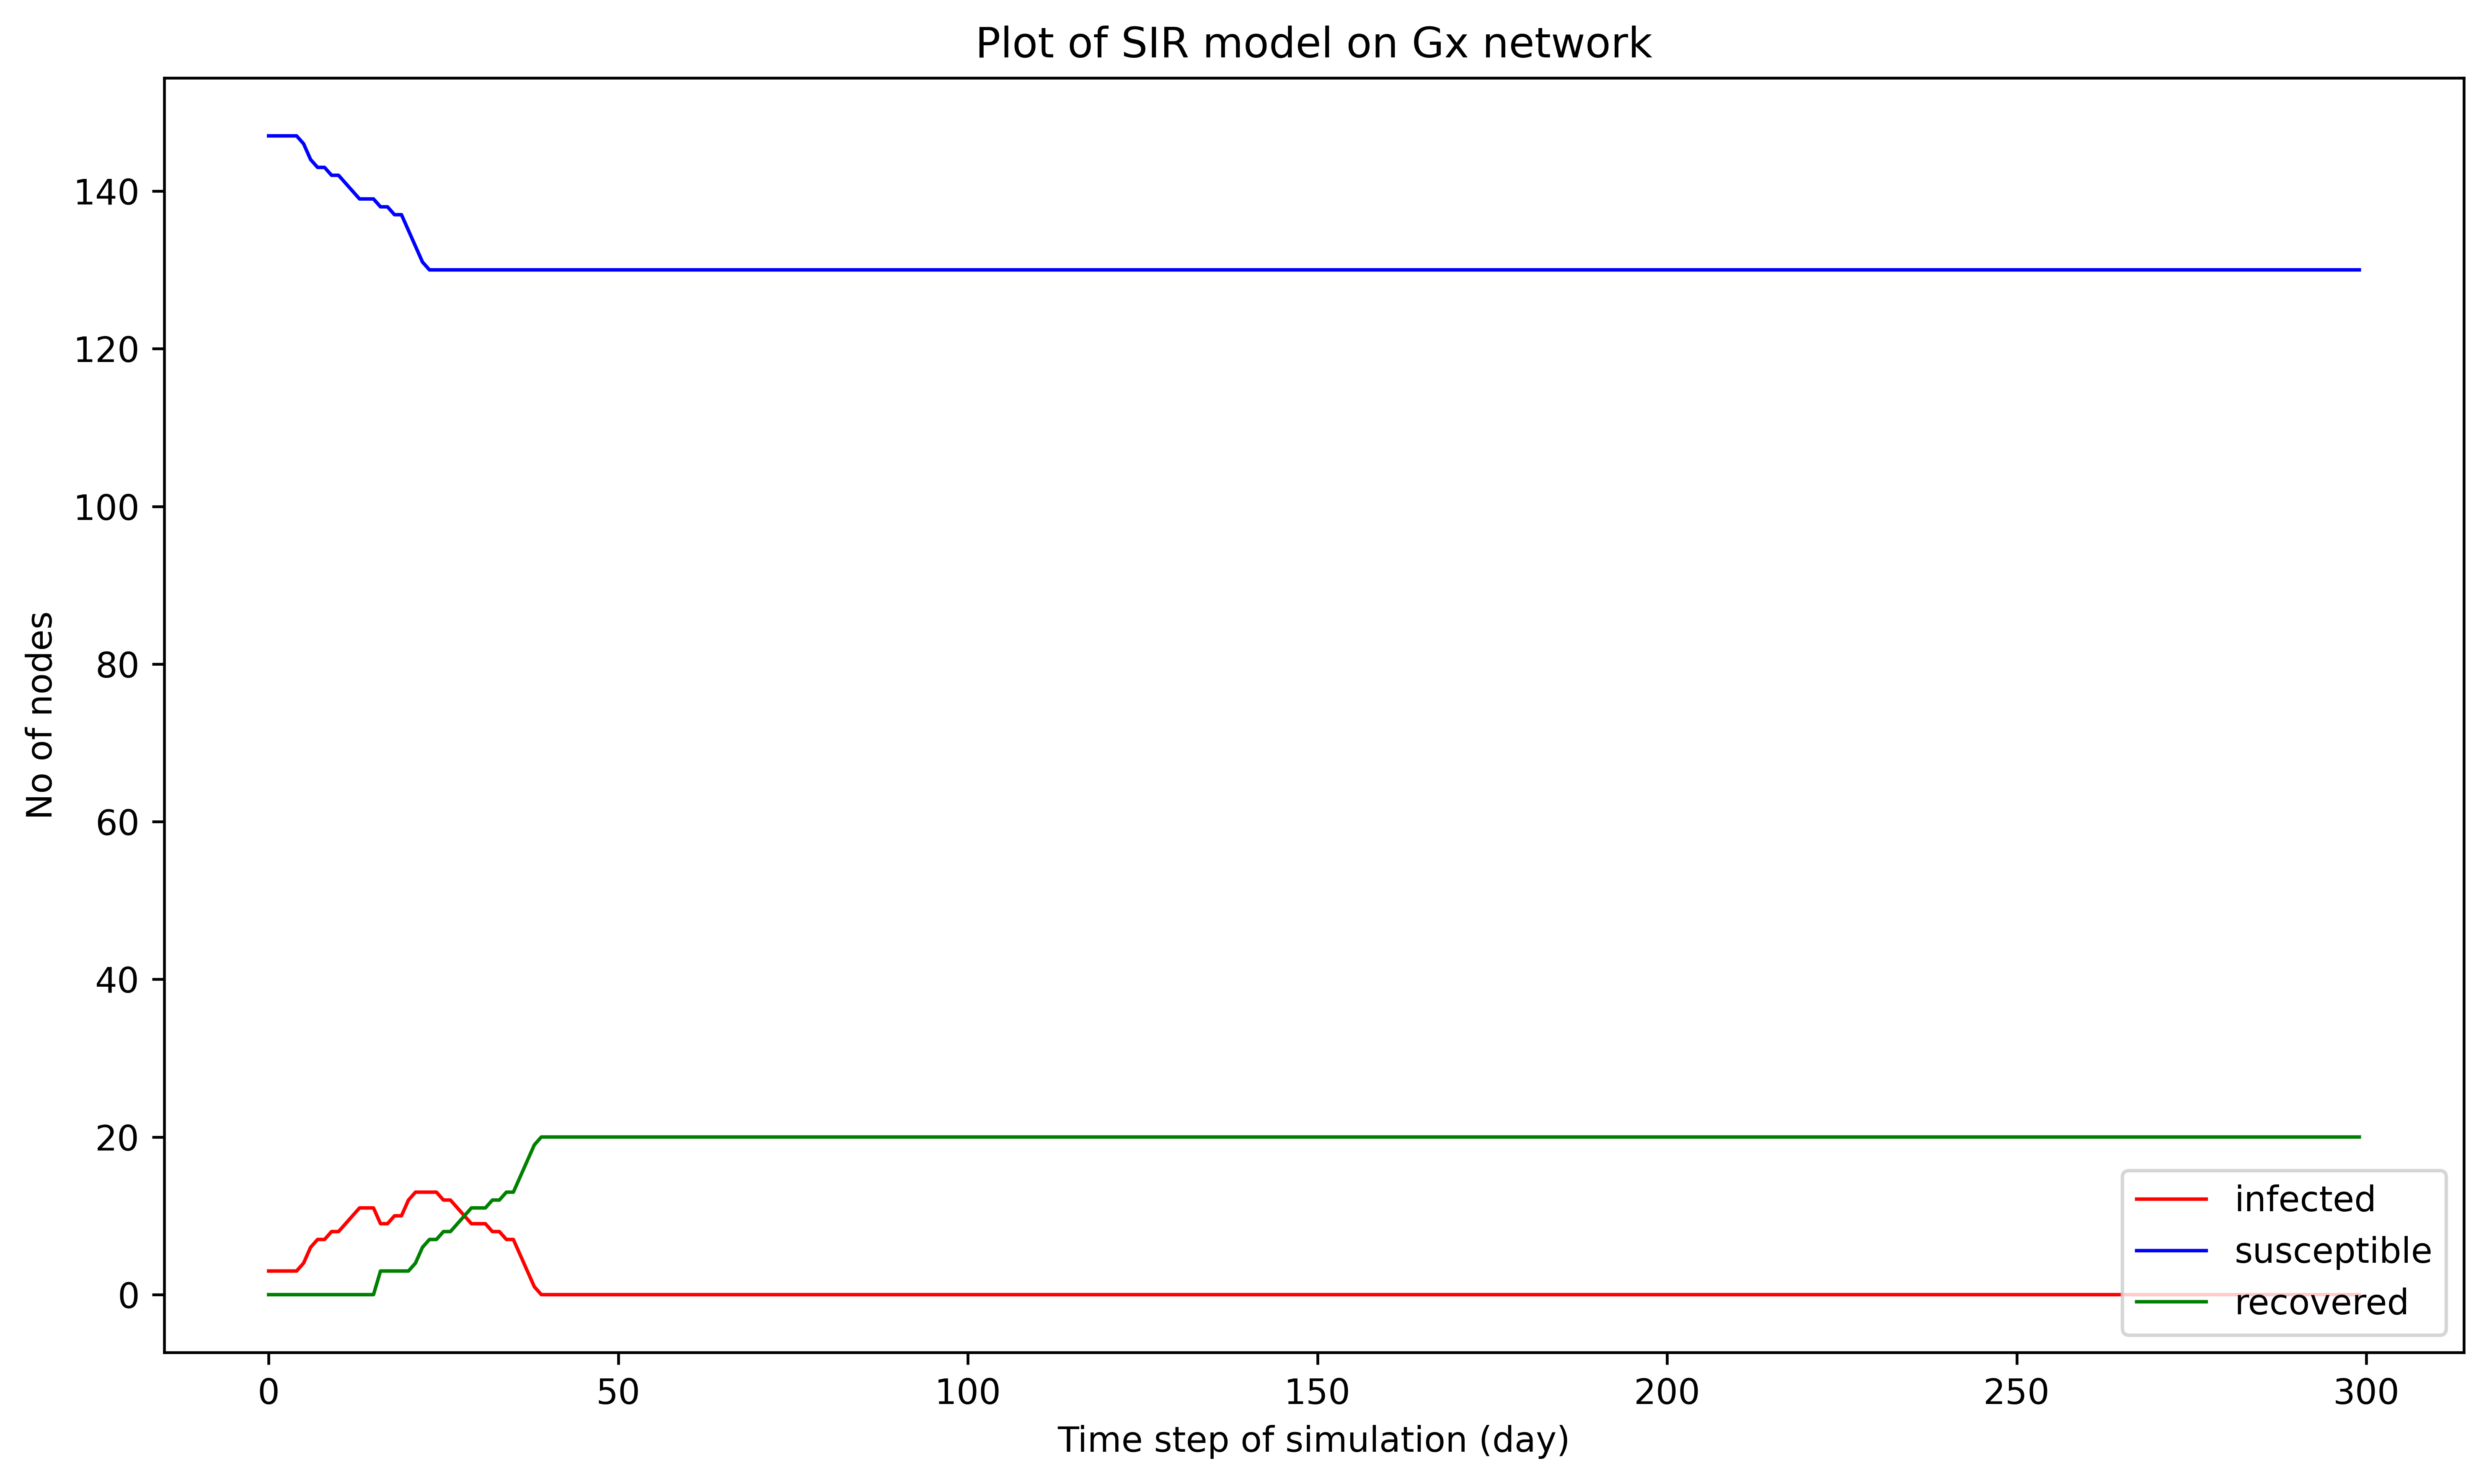

In [149]:
# creating SIR model function
def SIR_model(G, initial_infecteds, beta, t_simulation,recovery_time, recovered = []):
    
    infected = {node: 0 for node in initial_infecteds} # dict to keep track of the recovery time of each infected node
    susceptible = [node for node in G.nodes if node not in initial_infecteds+recovered]
    node_status = {}
    node_status[0] = {'S':susceptible,'I':list(infected.keys()), 'R':recovered}
    neighbours = G.adj
    
    for t in range(1,t_simulation):
        newly_infected = {}
        newly_recovered = []

        for s_node in susceptible:
            s_neighbours = set(dict(neighbours[s_node]).keys())
            if len(s_neighbours.intersection(set(infected)))>0:
                if coinFlip(beta)==1:
                    newly_infected[s_node] = 0
        
        for i_node in infected.keys():
            if infected[i_node] == recovery_time:
                newly_recovered.append(i_node)
            else:
                infected[i_node] += 1
                
        infected.update(newly_infected)
        infected = {node:infected[node] for node in infected.keys() if node not in newly_recovered} # removing the newly recovered from the infected list
        recovered = recovered + newly_recovered
        susceptible = [node for node in susceptible if node not in newly_infected] # removing the newly infected from the susceptible list list
        susceptible = [node for node in susceptible if node not in newly_recovered] # removing the newly recovered from the susceptible list list

        node_status[t] = {'S':susceptible,'I':list(infected.keys()), 'R':recovered}

    return node_status

# plotting the simulations of SIR model 
sir_nodes = SIR_model(Gx, initial_infecteds=[1,45,78], beta=0.005, t_simulation=300, recovery_time=15)
plot_model_simulation(nodes_status=sir_nodes, model='SIR')

## Second Wave

After 100 days a second wave of the same infection start to spread on your network. Starting from day
100: 30 people get infected randomly in your network. Keep fixed the simulation propose by the SIR Model in
question 3.b. At day 100, randomly add 30 new infections. If a person is infected by the second wave this set
of rules applied:
• if the person was ’S’ it became infected.
• if the person was ’I’ you need to set to zero the recovery time (it will have to wait 15 days to became
immune).
• ’R’ remain recovered and it is immune to the second wave.
This new infection transmits more easily and it has a beta=0.02!

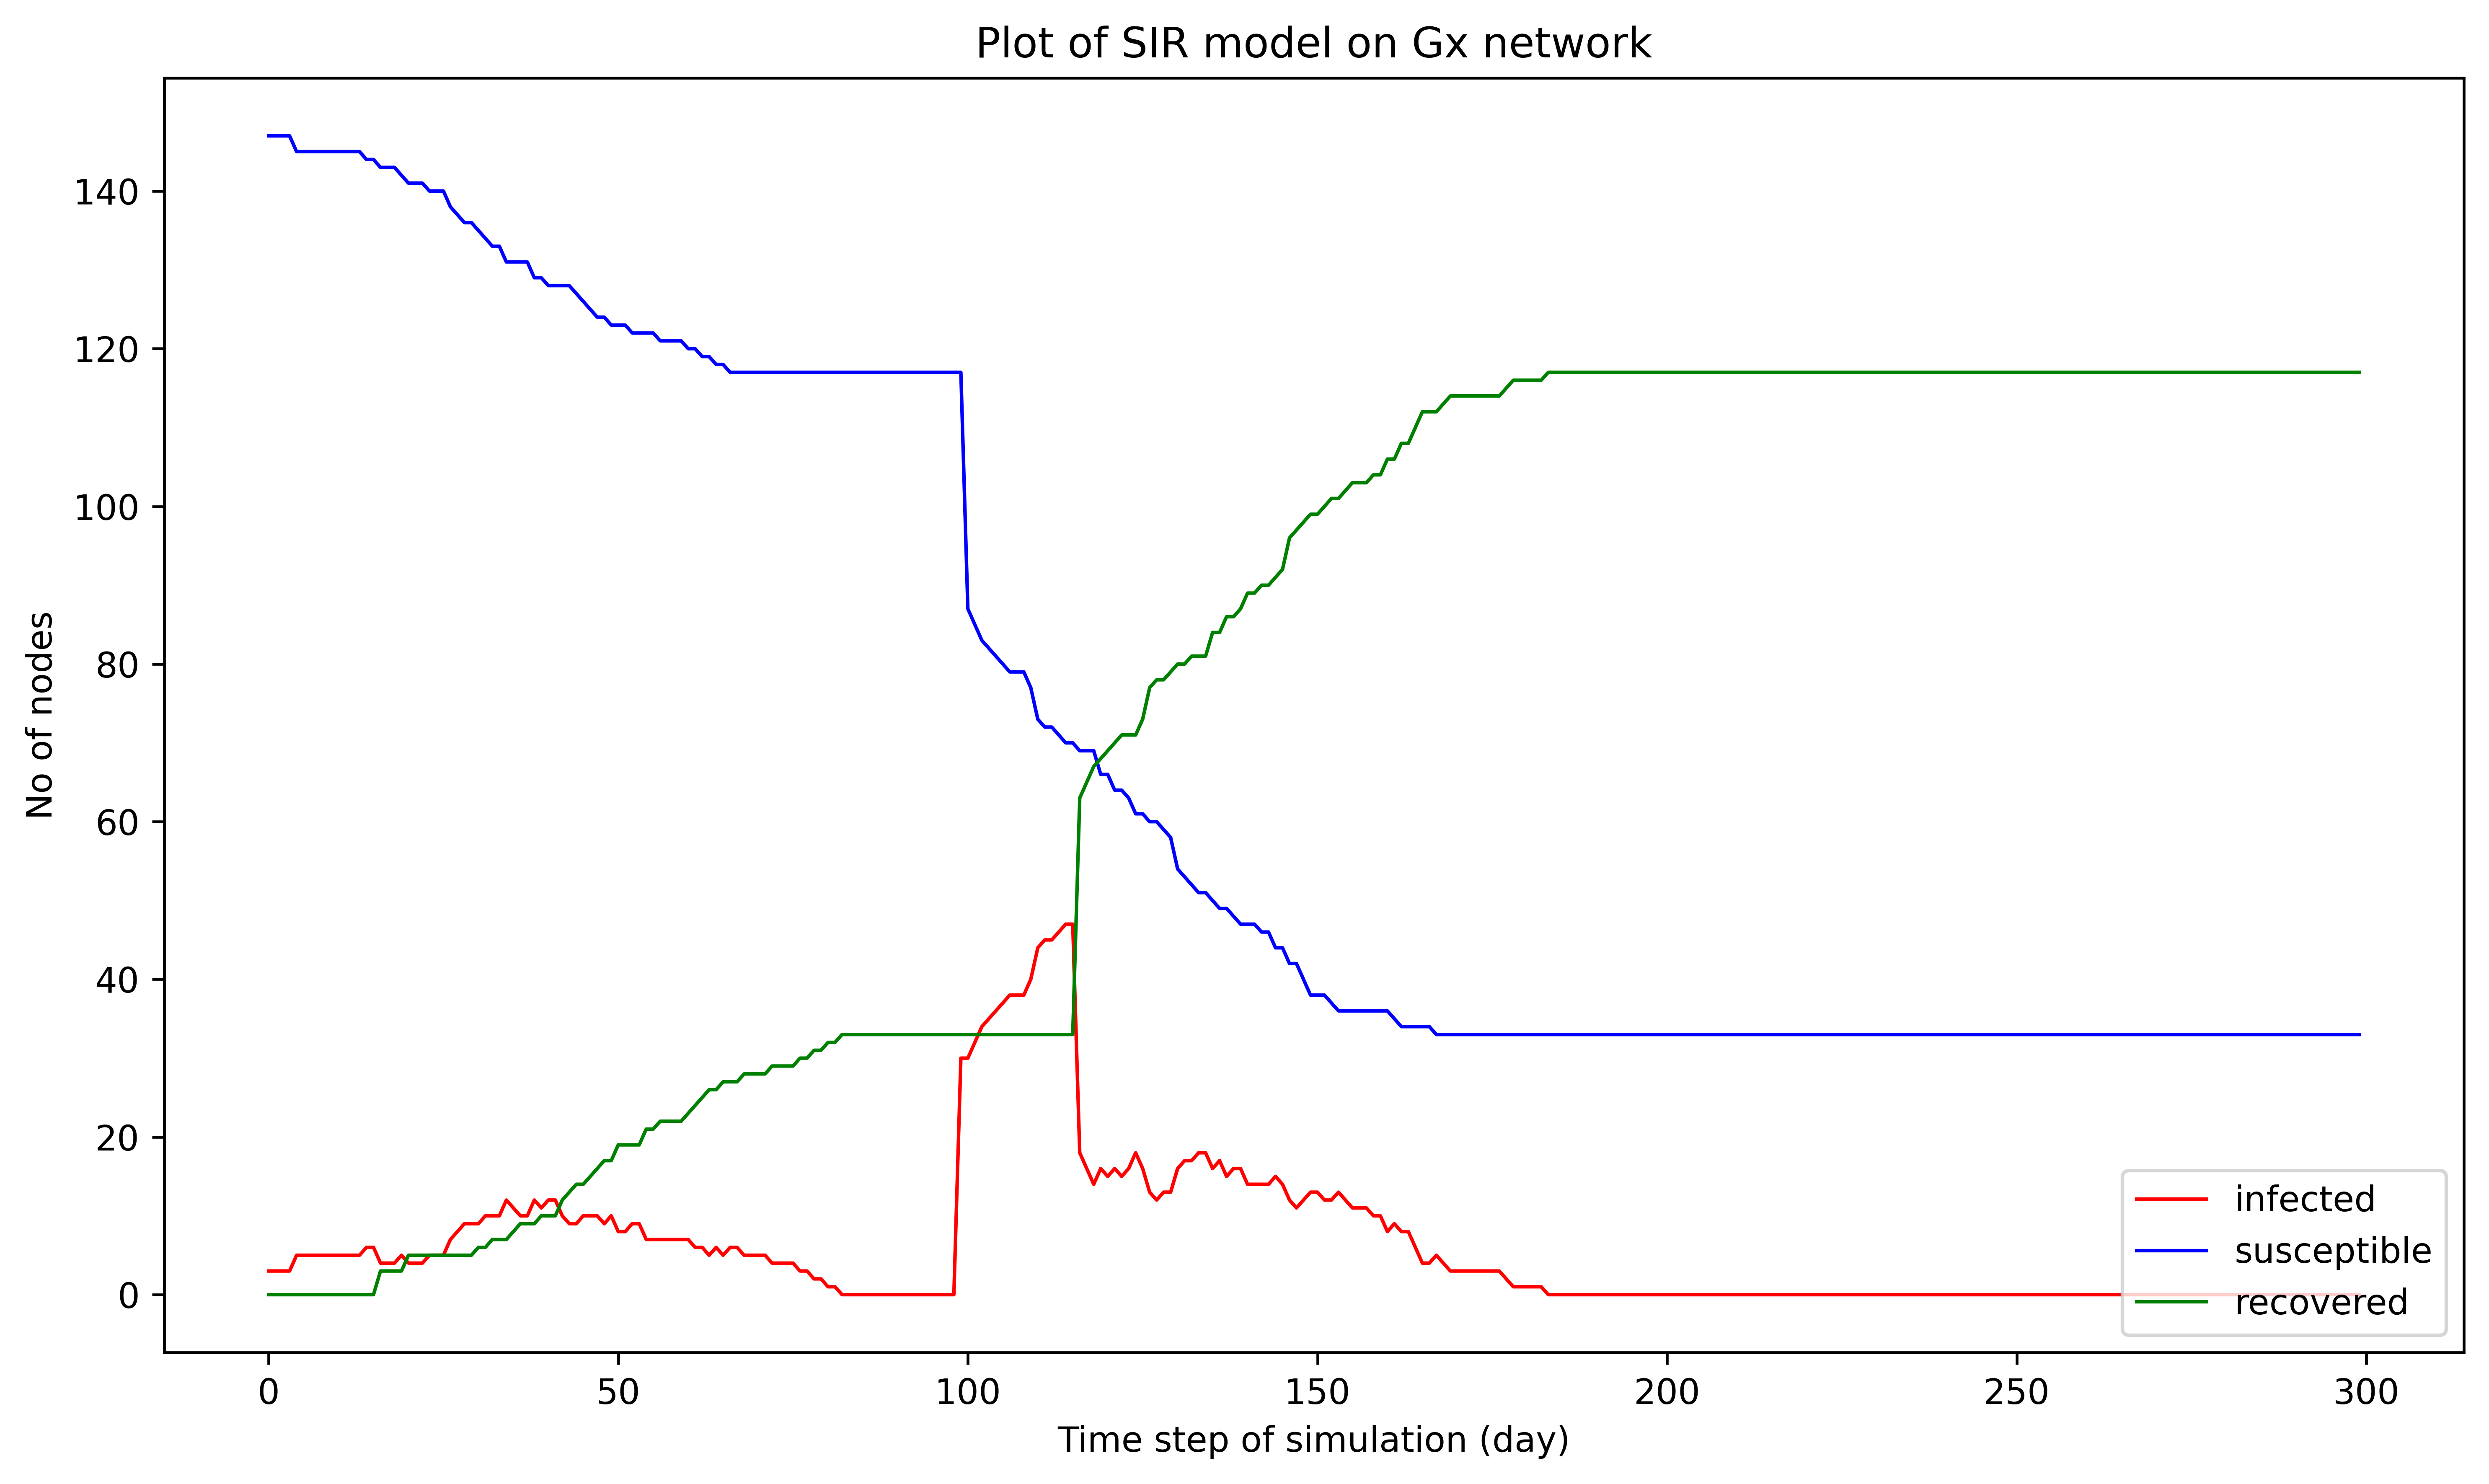

In [151]:
# creating SIR model with second wave
def SIR_model_second_wave(G, initial_infecteds, beta, t_simulation, recovery_time, beta_wave2):
    # first 100 days of infection
    first_wave = SIR_model(G, initial_infecteds=initial_infecteds, beta=beta, t_simulation=100, recovery_time=recovery_time)
    # now 2nd wave
    susceptible = first_wave[99]['S']
    infecteds = first_wave[99]['I']
    # adding 30 more infections randomly by selecting from susceptible list
    infecteds += random.sample(susceptible, 30)

    recovered = first_wave[99]['R']
    sec_wave = SIR_model(G, initial_infecteds=infecteds, beta=beta_wave2, t_simulation=t_simulation-100, 
                         recovery_time=recovery_time, recovered=recovered)

    sec_wave = {t+100:sec_wave[t] for t in sec_wave.keys()}
   
    # combining the node status for 2 waves
    first_wave.update(sec_wave)
    node_status = first_wave
    return node_status

# plotting the SIR model simulation with second wave.
sir_2wave = SIR_model_second_wave(Gx, initial_infecteds=[1,45,78], beta=0.005, t_simulation=300, recovery_time=15, 
                                  beta_wave2=0.02)
plot_model_simulation(nodes_status=sir_2wave, model='SIR')

## Remarks 
Plotting all the simulations together and make your final remarks on the simulation result of SI, SIR and Second
Wave. Discussion on how the second wave affects the population?

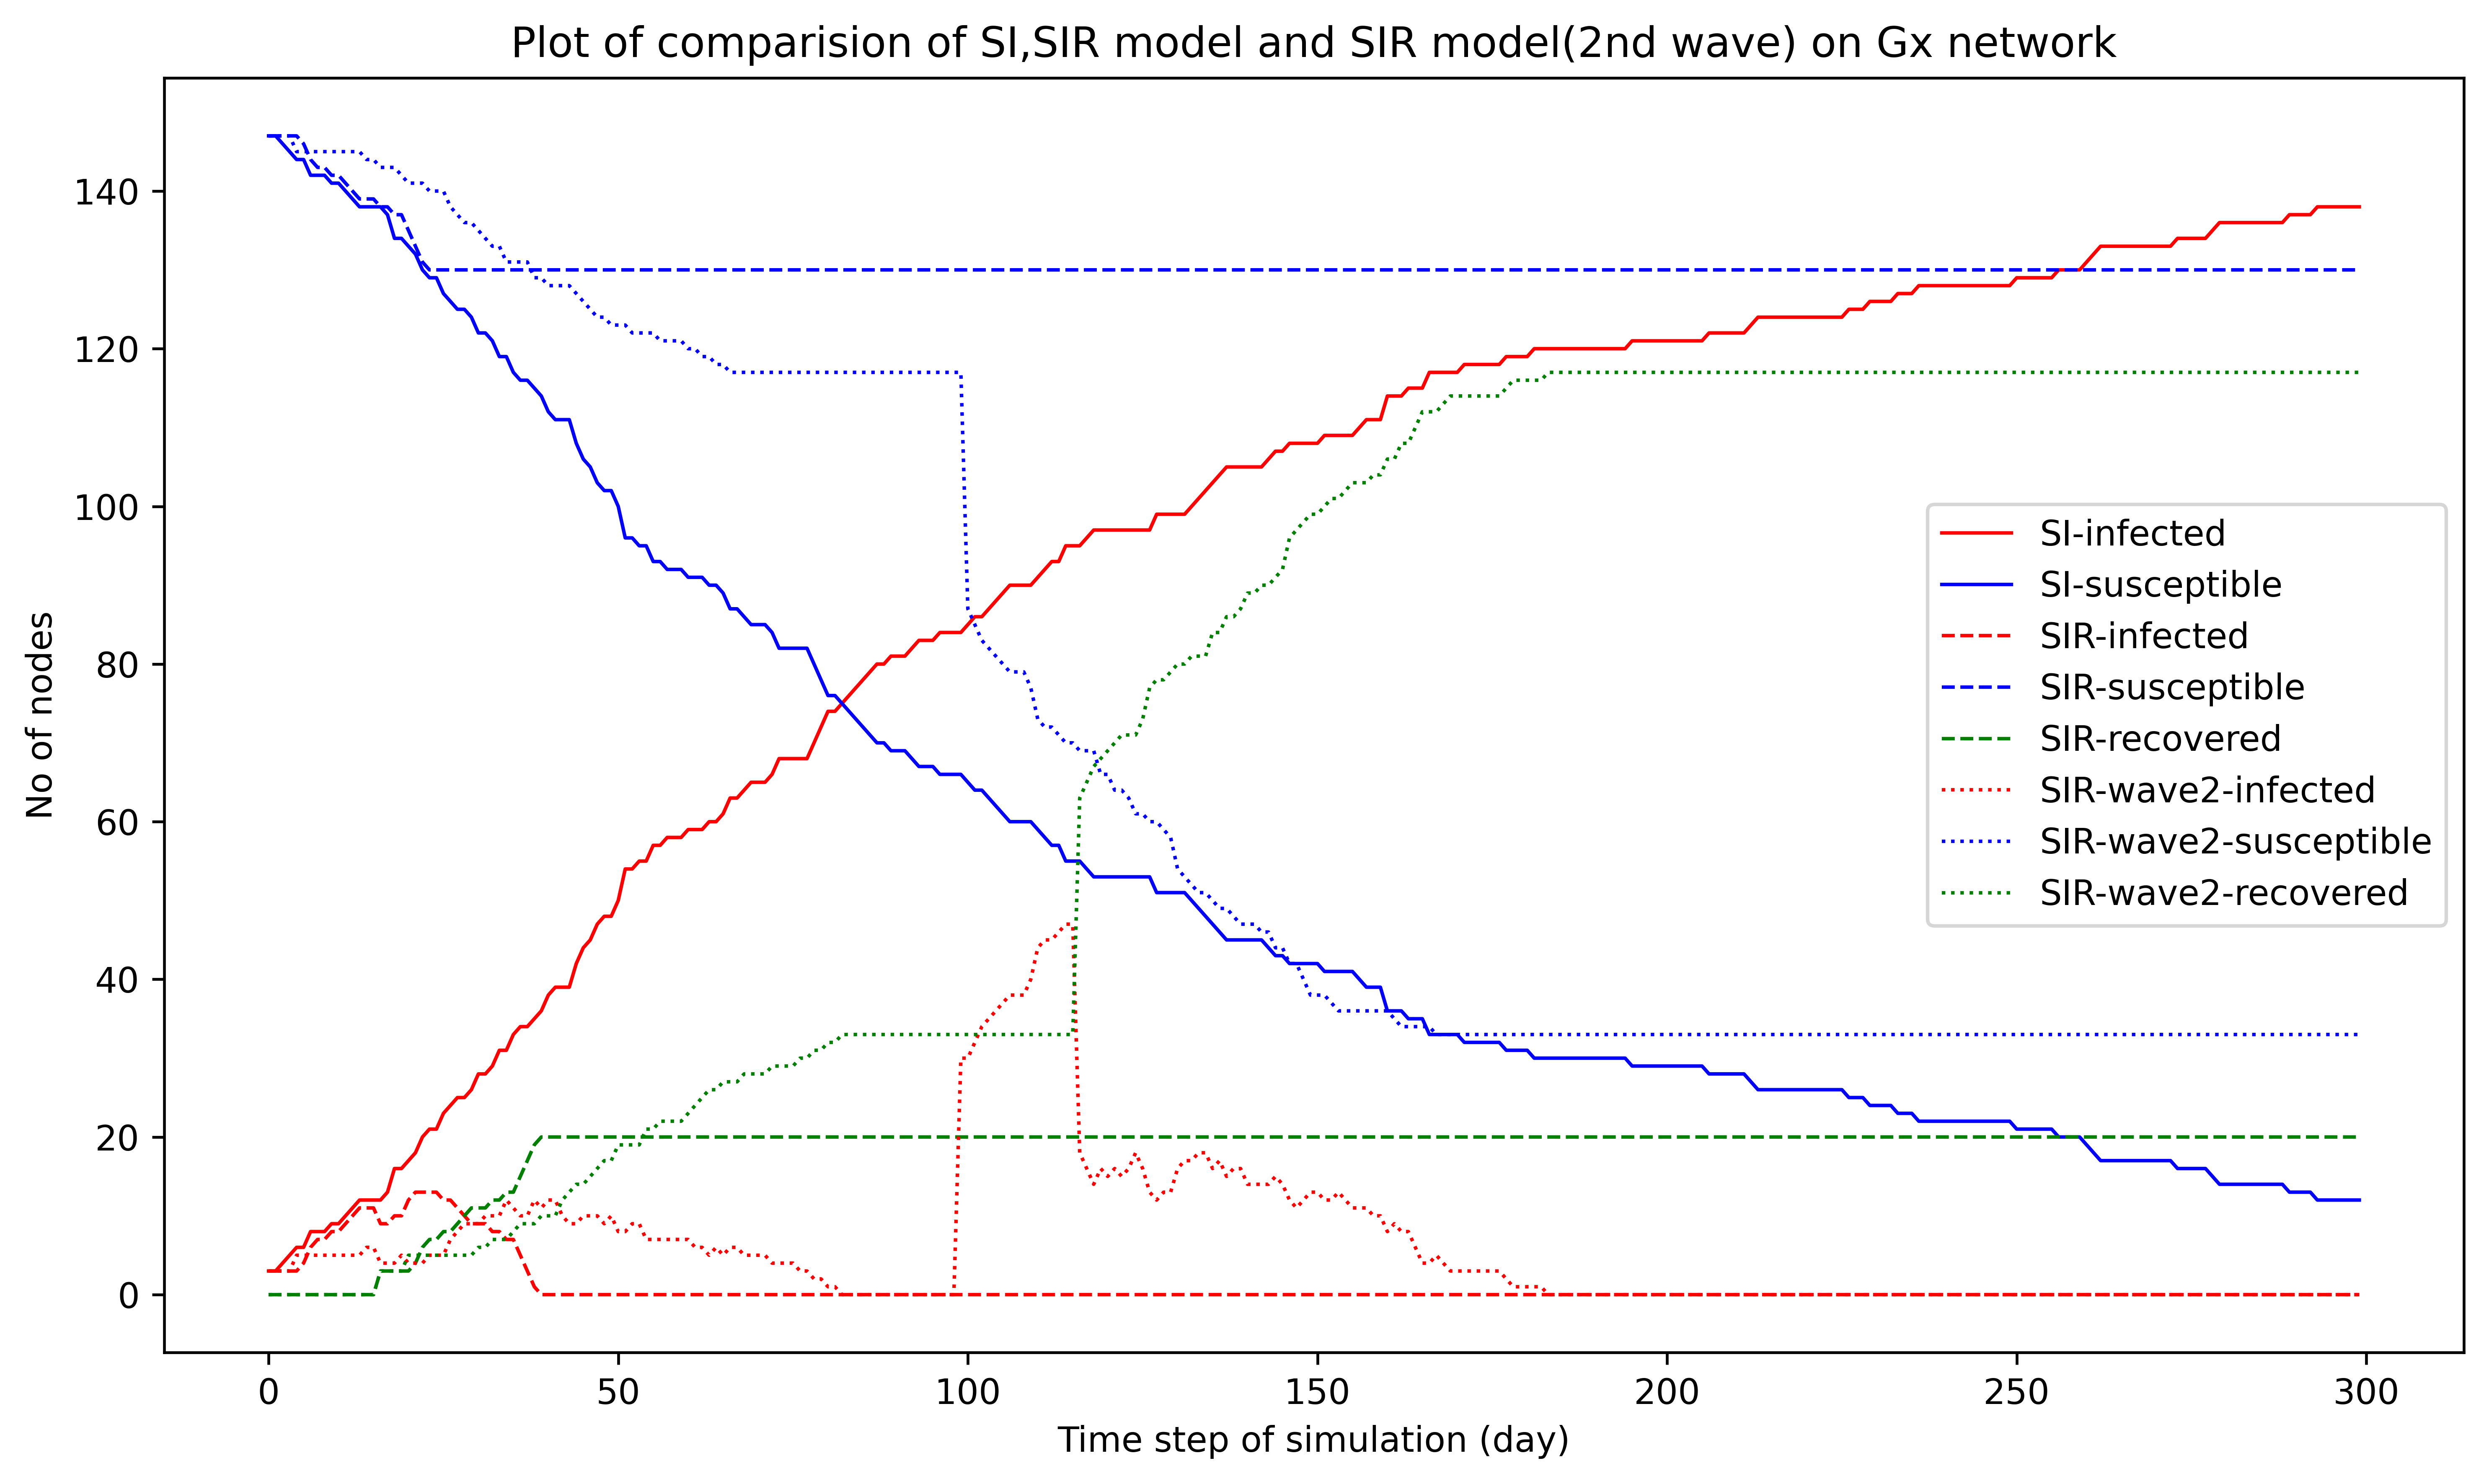

In [180]:
# creating the function to combine plots of 3 models
def model_simulation_comparision(nodes_status1, nodes_status2, nodes_status3):
    # plotting the SI model1
    infected = [len(nodes_status1[t]['I']) for t in nodes_status1.keys()]
    susceptible = [len(nodes_status1[t]['S']) for t in nodes_status1.keys()]
     
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi =300)
    axes.plot(nodes_status1.keys(), infected, label = 'SI-infected', color='r', lw=1)
    axes.plot(nodes_status1.keys(), susceptible, label = 'SI-susceptible', color='b', lw=1)
    
    # plotting the SIR model2
    infected = [len(nodes_status2[t]['I']) for t in nodes_status2.keys()]
    susceptible = [len(nodes_status2[t]['S']) for t in nodes_status2.keys()]
    recovered = [len(nodes_status2[t]['R']) for t in nodes_status2.keys()]
    axes.plot(nodes_status2.keys(), infected, label = 'SIR-infected', color='r', lw=1,ls='--')
    axes.plot(nodes_status2.keys(), susceptible, label = 'SIR-susceptible', color='b', lw=1,ls='--')
    axes.plot(nodes_status2.keys(), recovered, label = 'SIR-recovered', color='g', lw=1,ls='--')
    
    # plotting the SIR model with second wave
    infected = [len(nodes_status3[t]['I']) for t in nodes_status3.keys()]
    susceptible = [len(nodes_status3[t]['S']) for t in nodes_status3.keys()]
    recovered = [len(nodes_status3[t]['R']) for t in nodes_status3.keys()]
    axes.plot(nodes_status3.keys(), infected, label = 'SIR-wave2-infected', color='r', lw=1,ls=':')
    axes.plot(nodes_status3.keys(), susceptible, label = 'SIR-wave2-susceptible', color='b', lw=1,ls=':')
    axes.plot(nodes_status3.keys(), recovered, label = 'SIR-wave2-recovered', color='g', lw=1,ls=':')
    
    axes.set_xlabel("Time step of simulation (day)")
    axes.set_ylabel("No of nodes")
    axes.set_title('Plot of comparision of SI,SIR model and SIR model(2nd wave) on Gx network')
    axes.legend()
    fig.tight_layout()
    plt.show()
    
model_simulation_comparision(si_nodes, sir_nodes, sir_2wave) 

The above plot shows all the 3 simulations together. 

Simulations of SI model are quite simple. There is a continuous increase in the number of infected people over the time. Regarding SIR model, the numbers of recovered people, infected people and susceptible people staturate very quickly (i.e. within first 40 days.) It means that after this point, there is not much spread of infection.However, when there is a second wave, there are some drastic changes in the situation of spread of infection. After the second wave, there is a sudden increase of infected people, but after 80 days or so of the second wave, the number of infected people sataurates to nearly zero again.  The rate of people recovering also becomes high,because the number of infections and also the rate of infection has increased in second wave. Before second wave, the recovered number was saturatig at only 30, but after the second wave the recovered number saturates at 120. Also, there are lesser number of susceptible people after the second wave because most of the people are either infected or recovered. 